<a href="https://colab.research.google.com/github/Weifan-Lu/TiMEpy/blob/main/Simple_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TiMEpy**: A Python Package for Analyzing **Ti**dal **M**odulation of Fast and Slow **E**arthquakes

**User Guide**, Version 1

Weifan Lu\
The University of Tokyo & Peking University\
Email: luweifan001@gmail.com\
Homepage: https://weifan-lu.github.io/



This guide provides the steps to quickly install and run ***TiMEpy***, a Python-based project for processing and analyzing earthquake and tides.



---


## **1. Environment Setup**
*   Python Version: Ensure you have Python 3.6 or higher installed.
*   Package Manager: Use pip or conda to manage dependencies.





---


## **2. Clone the Repository**

Clone the TiMEpy repository from GitHub (or your preferred repository host) using the following commands:




In [ ]:
!git clone https://github.com/Weifan-Lu/TiMEpy

Cloning into 'TiMEpy'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 244 (delta 131), reused 139 (delta 54), pack-reused 0 (from 0)
Receiving objects: 100% (244/244), 27.56 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (131/131), done.




---


## **3. Install Dependencies**

Install all required Python packages. In the project root directory, run:

In [ ]:
!pip install numpy matplotlib scipy



---


## **4. Configure the Project**

Before running the scripts, adjust the configuration settings in the configuration file (e.g., input_params_rc.py). Update parameters such as:

*   Data file paths
*   Output directories
*   Time ranges
*   Ensure that all paths and parameters reflect your local setup.




---


## **5. Run TiMEpy**

  In this example, we use the 2019 M7.1 Ridgecrest earthquake case.

  The ***main_run.py*** script can either run the entire program at once.
  
    python main_run.py

  For illustration purposes, here are the individual steps to run each component independently.

### **5.0 Creating Output Folder**

 In the beginning, please enter the program

In [ ]:
%cd TiMEpy/ex_ridgecrest

/content/TiMEpy/ex_ridgecrest


***Output:***

Four new empty folders

    output/catalog
    output/stress
    output/tidal_phase
    output/figure

***Run:***

    python ex_pre0_create_output.py

In [ ]:
!python ex_pre0_create_output.py

src_path = /content/TiMEpy/config
====== Processing | Creating Output Folder: Start ======
Created folder: ../ex_ridgecrest/output
Created folder: ../ex_ridgecrest/output/catalog
Created folder: ../ex_ridgecrest/output/tidal_phase
Created folder: ../ex_ridgecrest/output/stress
Created folder: ../ex_ridgecrest/output/figure
====== Processing | Creating output folder: End ======


###  **5.1 Preprocessing | Select catalog**
This catalog is from Beaucé et al. (2019) and is an enhanced earthquake catalog. \
You can find more details at:
https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023GL104375

***Input:***

    input/catalog.txt
    format:
    Year month day hour minute sec latitude longitude depth magnitude
***Output:***

    output/catalog/$name_select_catalog.txt
    format:
    Year month day hour minute sec latitude longitude depth magnitude

***Run:***

    python ex_pre1_select_catalog.py

In [ ]:
!python ex_pre1_select_catalog.py

src_path = /content/TiMEpy/config
====== Processing | Select catalog: Start ======
Selected catalog have been written to ../ex_ridgecrest/output/catalog/RC_select_catalog.txt
The selected catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_select_catalog.png
====== Processing | Select catalog: End ======


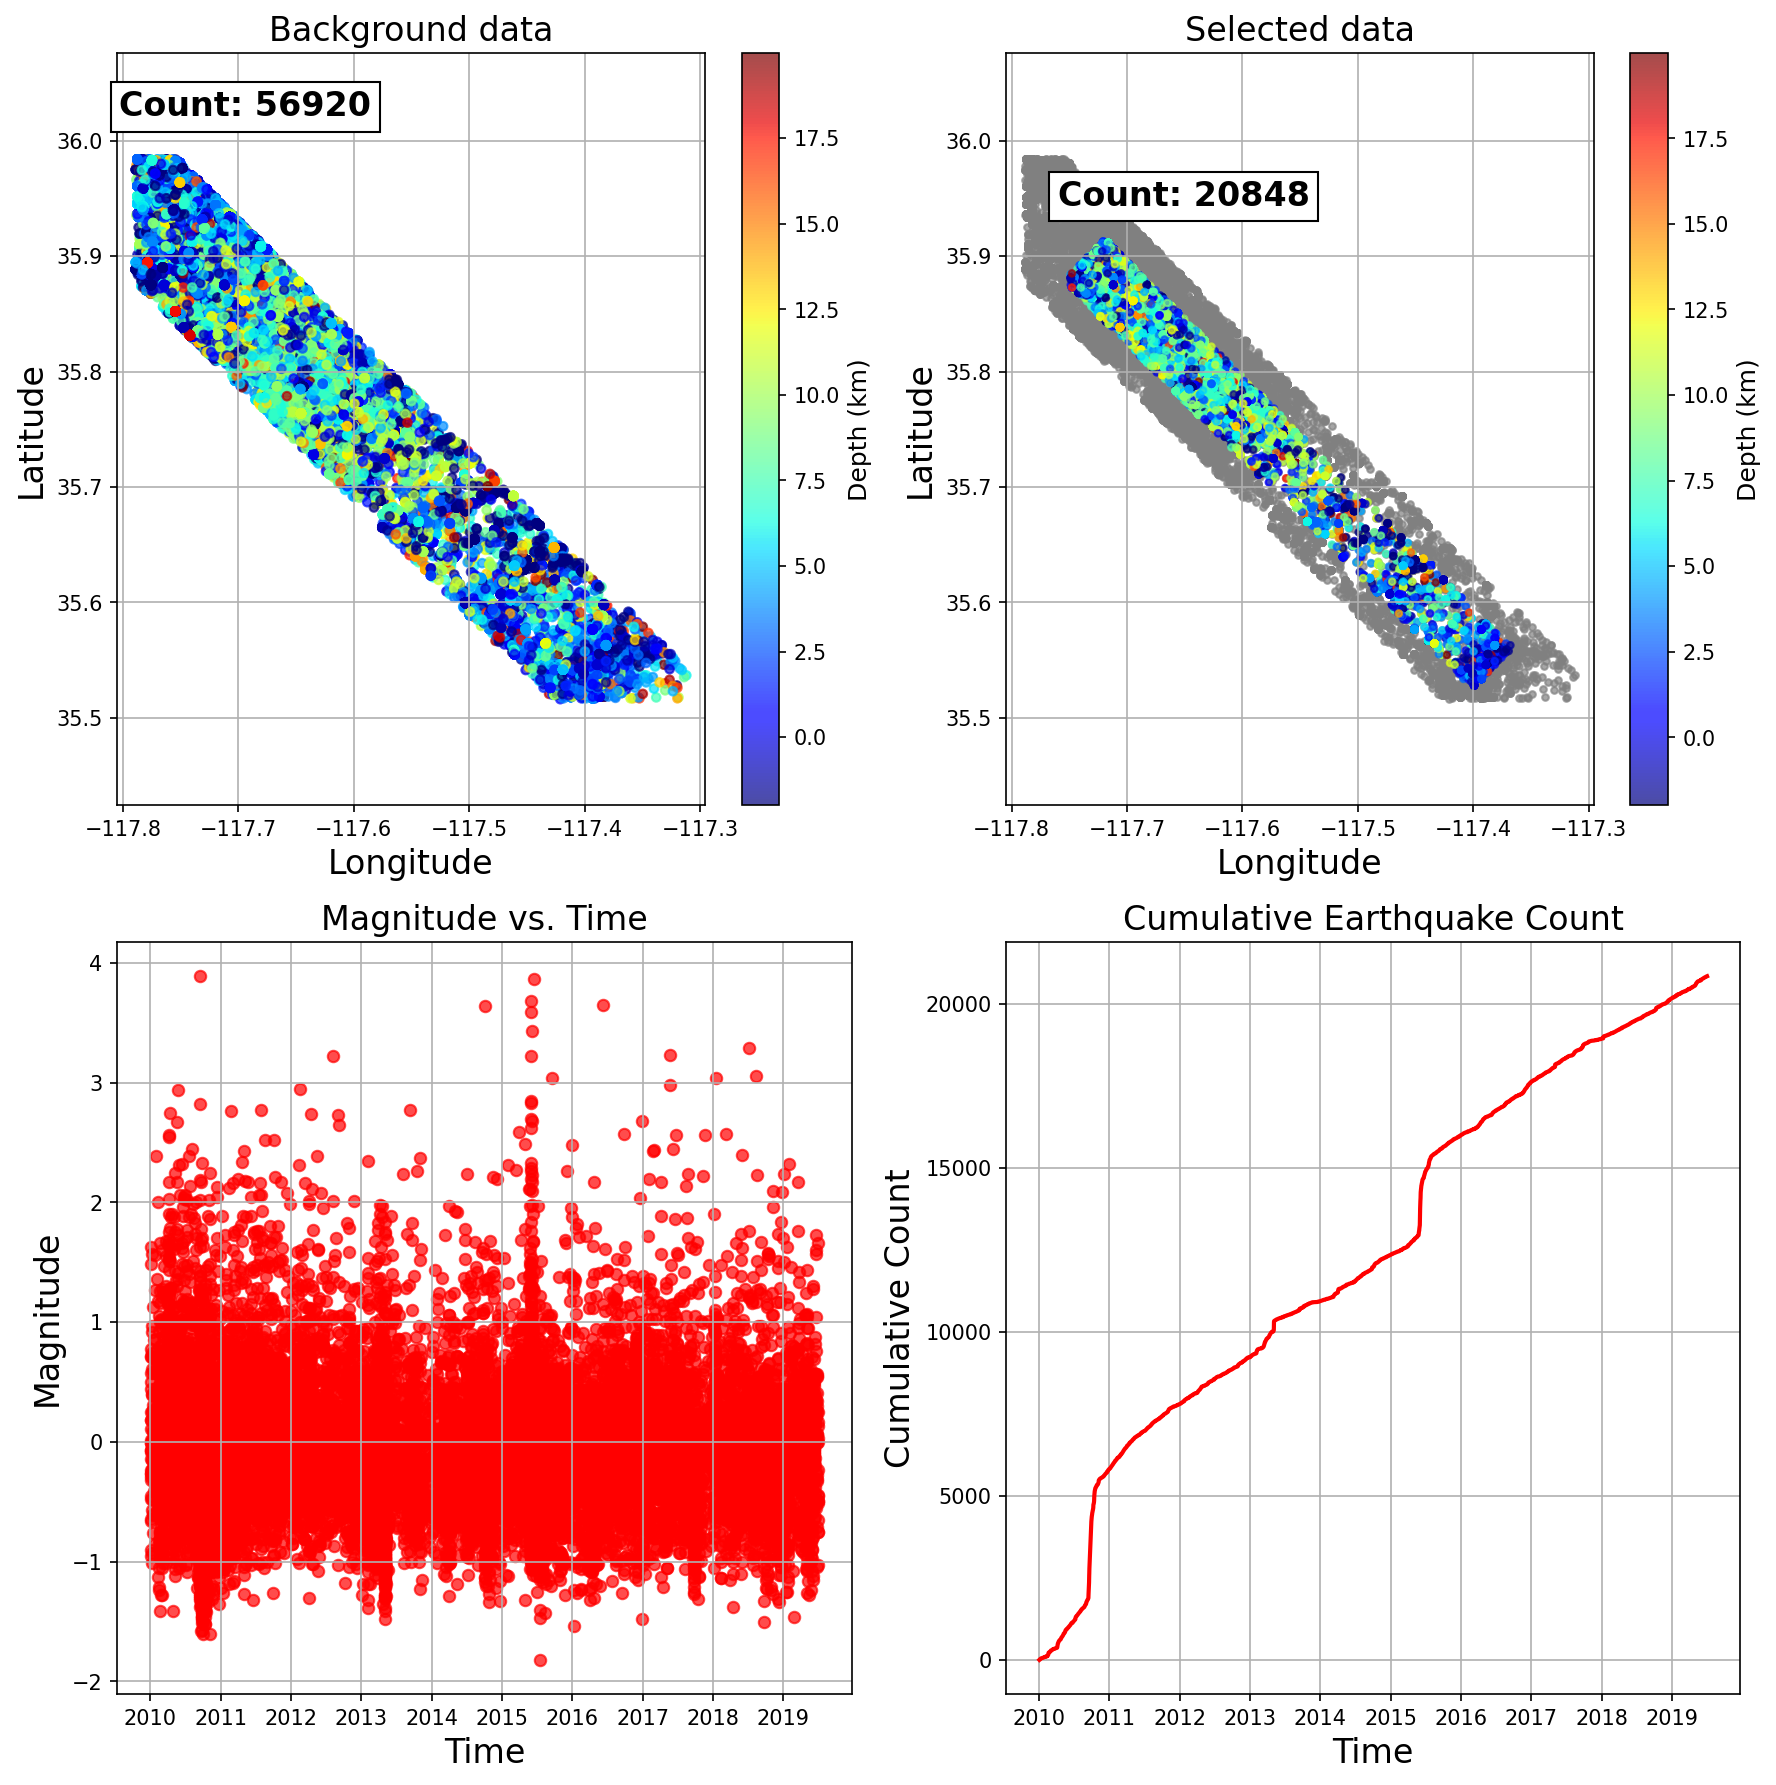

###  **5.2 Preprocessing | Declustering catalog**

Using Nearest-Neighbor Algorithm

***Input:***
    
    output/catalog/$name_select_catalog.txt

***Output:***
    
    1)	output/catalog/$name_select_catalog_decluster.txt
    2)	output/catalog/$name_select_catalog_decluster_dataobj.npy
    3)	output/figures/$name_decluster_catalog_lat.png
    4)	figures/$name_decluster_catalog_nna.png
    5)	figures/$name_decluster_catalog_cum.png

***Run:***
    python ex_pre2_decluster_NNA.py

In [ ]:
!python ex_pre2_decluster_NNA.py

src_path = /content/TiMEpy/config
====== Processing | Decluster catalog: Start ======
Declustered catalog have been written to ../ex_ridgecrest/output/catalog/RC_select_catalog_decluster.txt
====== Processing | Decluster catalog: plot figures ======
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_cum.png
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_lat.png
The declustered catalog has been successfully plotted and saved to ../ex_ridgecrest/output/catalog/RC_decluster_catalog_nna.png
====== Processing | Decluster catalog: End ======


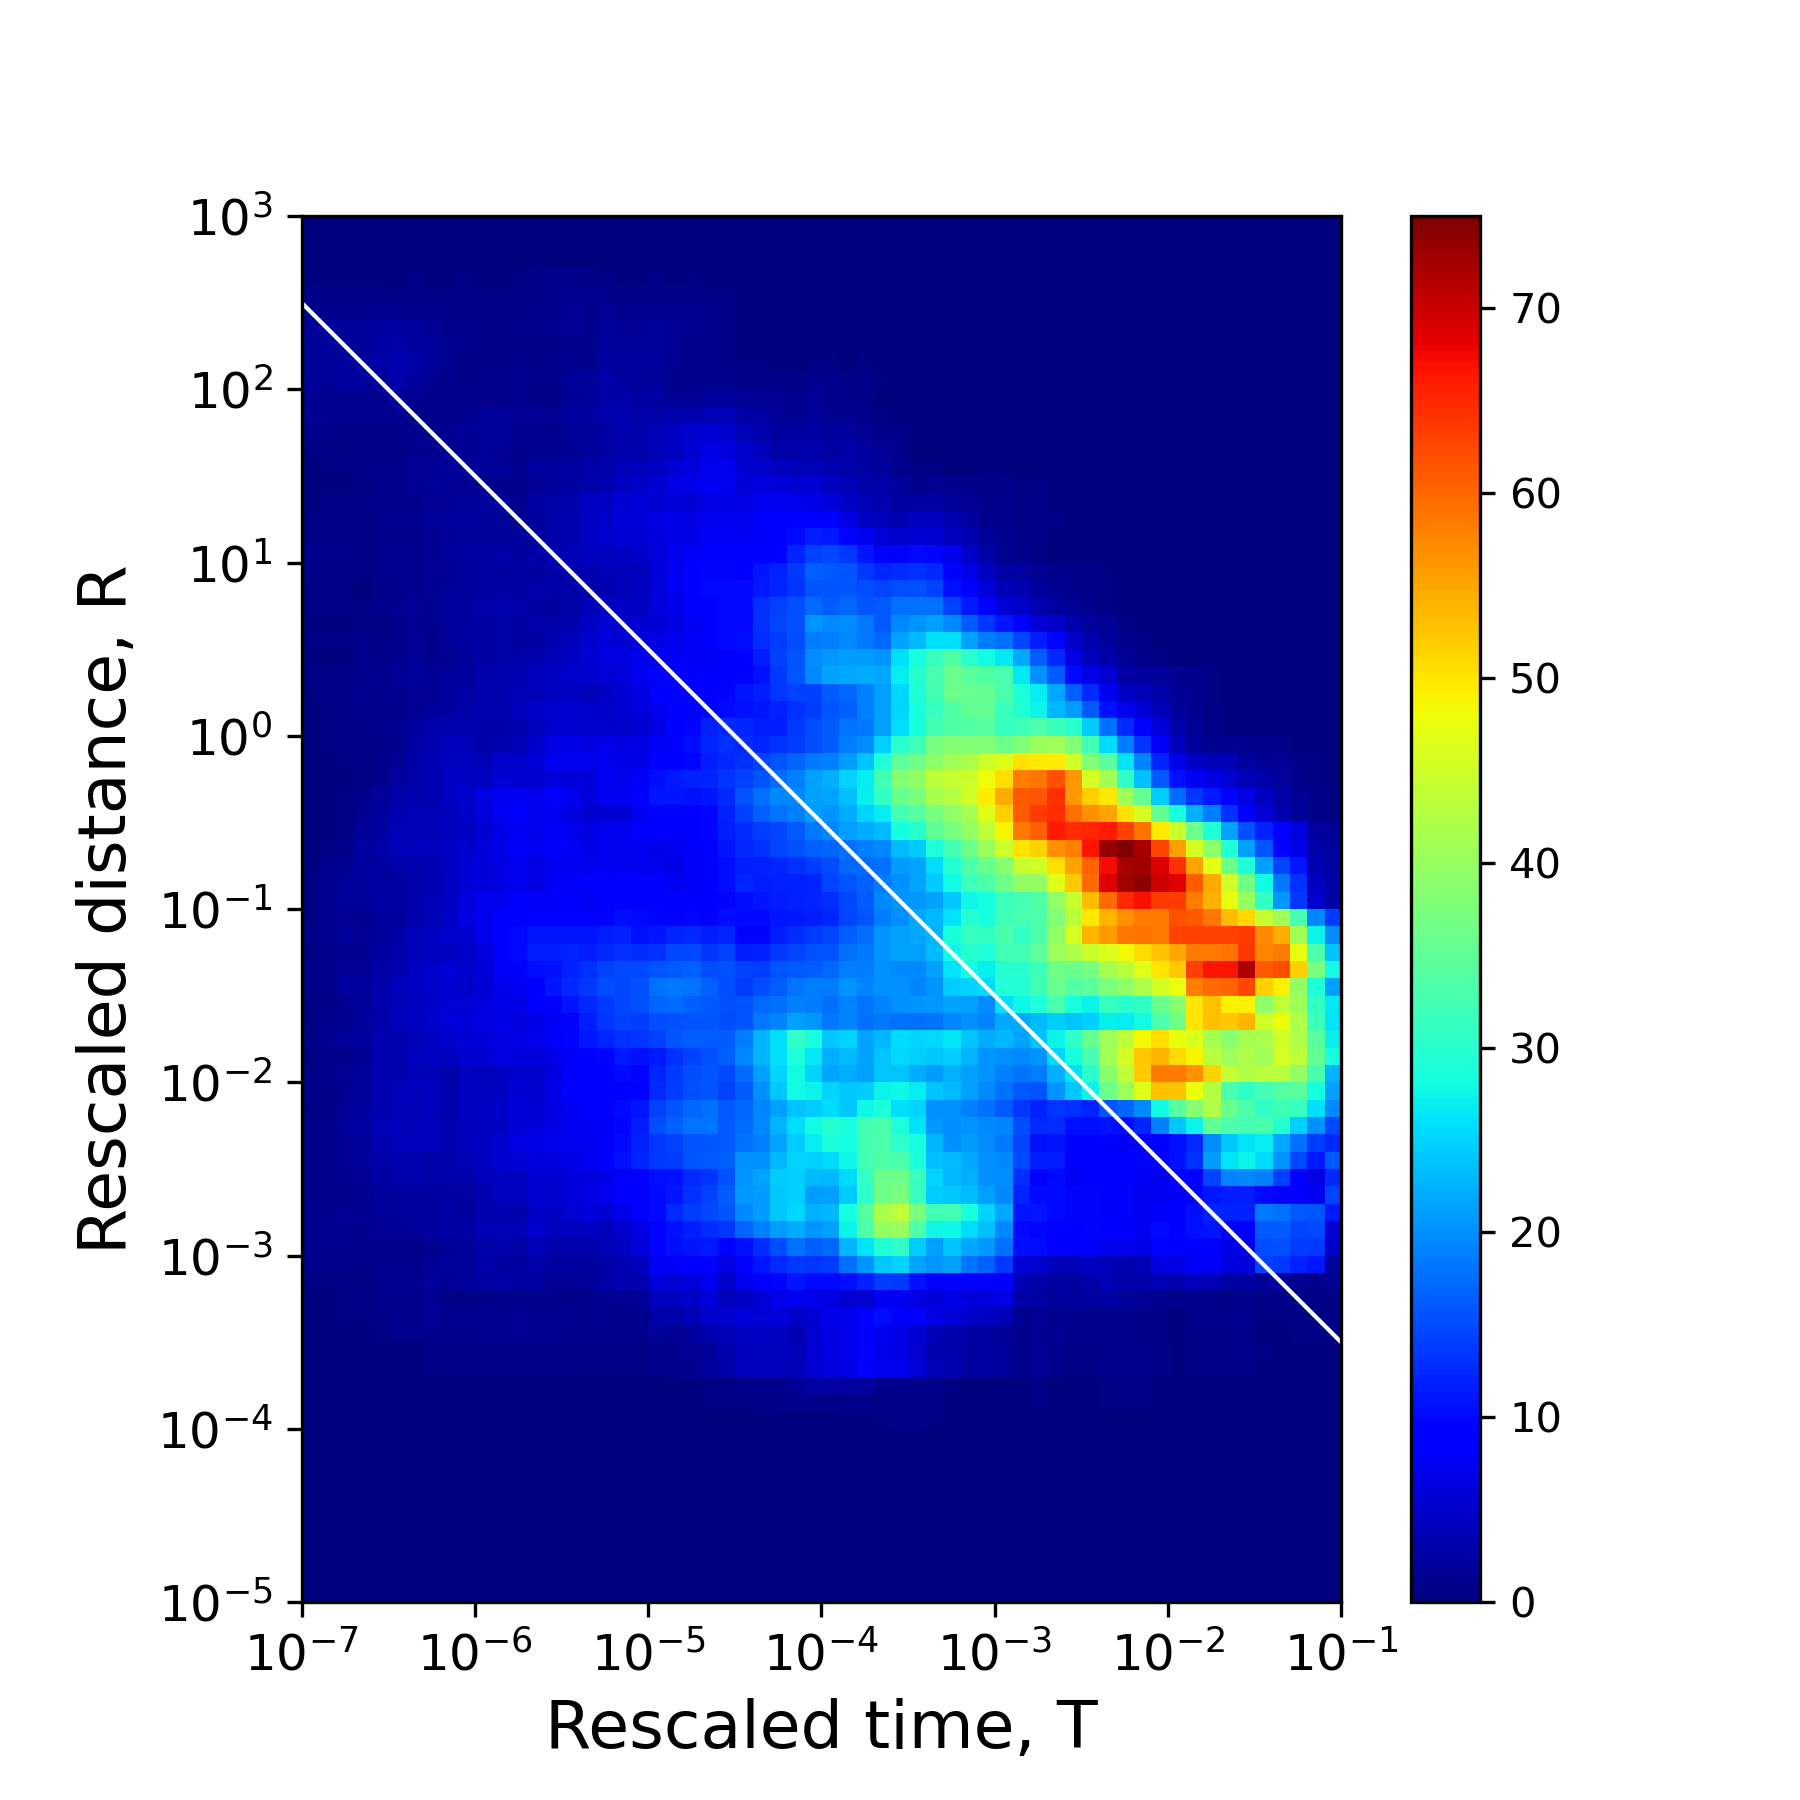

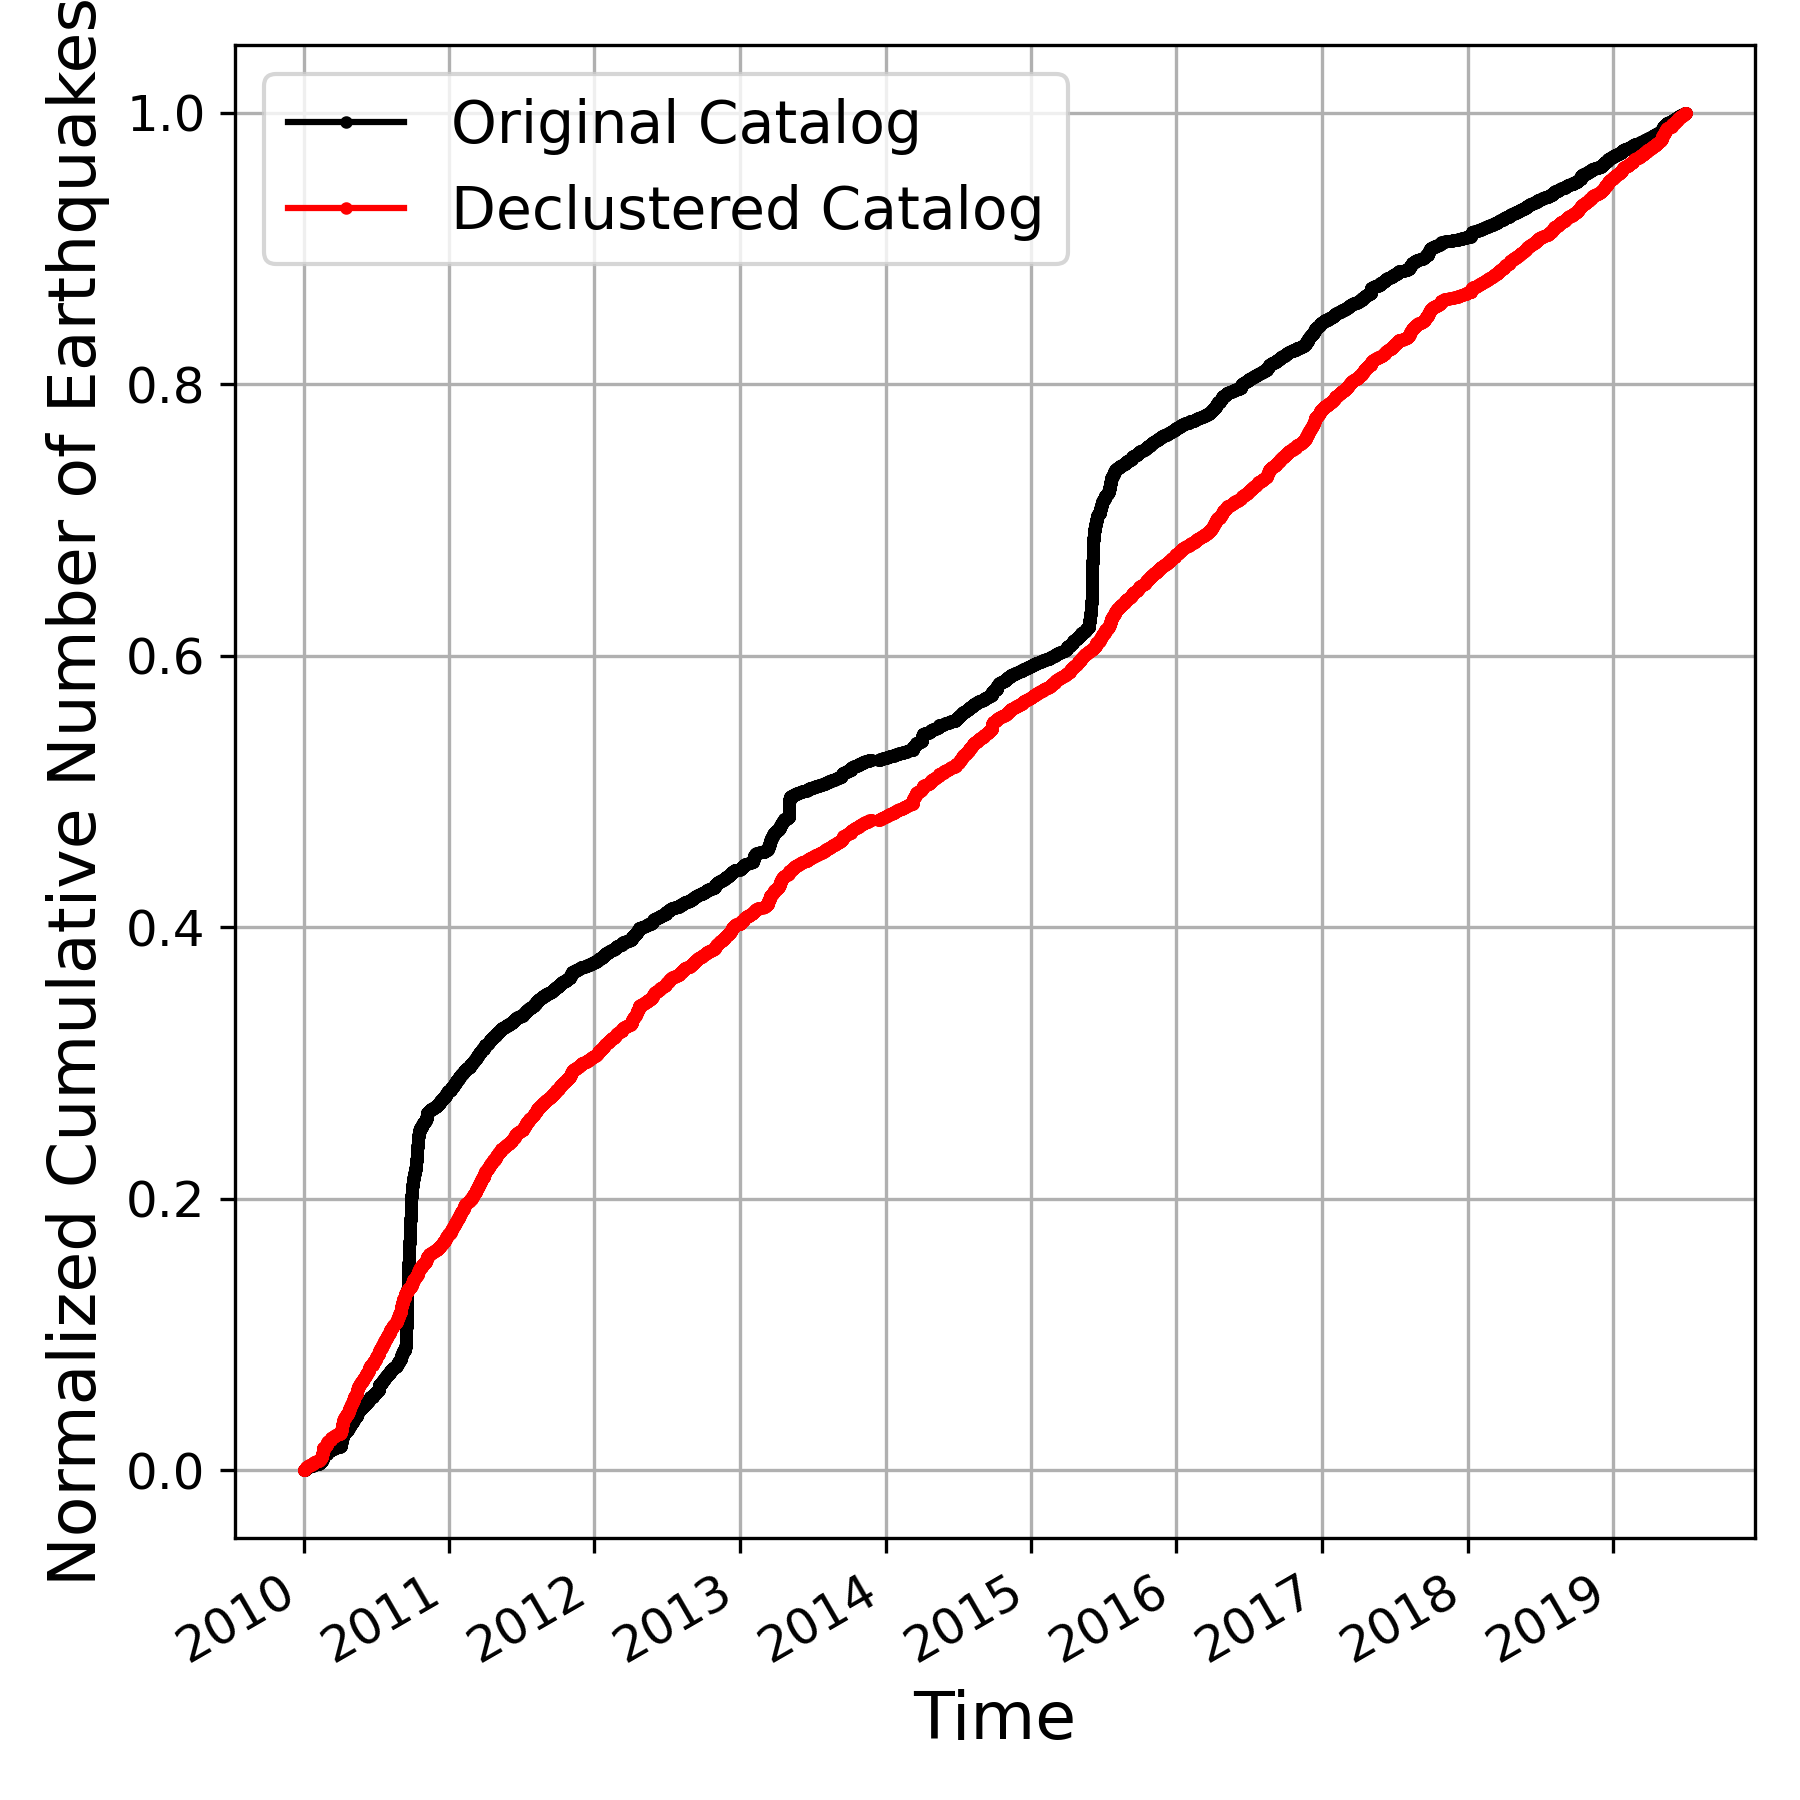

###    **5.3 Preprocessing |  Strain to Stress**
Tidal strain comes for TidalStrain.2 (Hirose et al., 2019)\
You can find more details at: \
https://www.mri-jma.go.jp/Dep/sei/fhirose/research/en.TidalStrain.html
https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019JB018088

***Input:***
    
    input/solid-ocean.out
    Format:
    Time           ε_xx       ε_yy          ε_zz       ε_xy       ε_xz    ε_yz          Elapsed time
    2009/01/01 00:00 -0.7170E-09 -0.1403E-08  0.8150E-09  0.3894E-08 -0.7200E-11 -0.9670E-10        0.0
    2009/01/01 00:06 -0.7610E-09 -0.1788E-08  0.9784E-09  0.4183E-08 -0.2300E-11 -0.8360E-10       60.0
    2009/01/01 00:12 -0.8110E-09 -0.2185E-08  0.1148E-08  0.4461E-08  0.3000E-11 -0.7070E-10      120.0


***Output:***
    
    output/stress/$name_stress_Vol_N_S.txt
    
    format:
    Time            Elapsed_time volumetric_strain Normal_stress Shear_stress
    2009/01/01 00:00  0.000000  -1.30500000e+01  -2.43460114e+01  1.01812858e+02
    2009/01/01 00:06  60.000000  -1.57060000e+01  -1.87941631e+01  9.85195623e+01
    2009/01/01 00:12  120.000000  -1.84800000e+01  -1.29643134e+01  9.38396283e+01


***Run:***

    python ex_pre3_strain_to_stress.py

In [ ]:
!python ex_pre3_strain_to_stress.py

src_path = /content/TiMEpy/config
====== Processing | Strin to Stress: Start ======
rr = 6359.0, i = 11
34.2 26.6 12.000 5.80 3.20 2.60
Stress results have been written to ../ex_ridgecrest/output/stress/RC_stress_Vol_N_S.txt
====== Processing | Strin to Stress: End ======


###   **5.4 Analysis | Earthquakes are associated with tidal stresses**

***Input:***
    
    1)catalog
    opt = 1: fast earthquakes
      -	output/catalog/$name_select_catalog_decluster.txt
    else: slow earthquakes
      -	output/catalog/$name_select_catalog.txt
    2)stress
    output/stress/$name_stress_Vol_N_S.txt

***Output:***
    
Four files containing the phases and levels of observed earthquake events:
    
    output/tidal_phase/$name_phase_stress_obs_CFS.txt
    output/tidal_phase/$name_phase_stress_obs_N.txt
    output/tidal_phase/$name_phase_stress_obs_S.txt
    output/tidal_phase/$name_phase_stress_obs_Vol.txt


Four files containing the phases and levels of reference (background) earthquake events:

    output/tidal_phase/$name_phase_stress_ref_CFS.txt
    output/tidal_phase/$name_phase_stress_ref_N.txt
    output/tidal_phase/$name_phase_stress_ref_S.txt
    output/tidal_phase/$name_phase_stress_ref_Vol.txt


***Run:***

    python ex_ana1_calc_tidal_phase.py

In [ ]:
!python ex_ana1_calc_tidal_phase.py

src_path = /content/TiMEpy/config
====== Analysis | Earthquakes are associated with tidal stresses: Start ======
Start calculating the phase of the tide (Obs)
start time: 2010-01-01 00:00:00   end time:  2019-07-03 00:00:00  len_stress:  927361 len_time:  927361
Plot stress v.s. eqs
The figure plotted and saved to ../ex_ridgecrest/output/figure/RC_TM_time_tidal_stress.pdf
Start calculating the phase of the tide (Ref)
Tidal phase results have been saved as TXT files with the following details:
  - Observation files:
      ../ex_ridgecrest/output/tidal_phase/RC_phase_stress_obs_N.txt (Normal Stress)
      ../ex_ridgecrest/output/tidal_phase/RC_phase_stress_obs_S.txt (Shear Stress)
      ../ex_ridgecrest/output/tidal_phase/RC_phase_stress_obs_CFS.txt (Coulomb Failure Stress)
      ../ex_ridgecrest/output/tidal_phase/RC_phase_stress_obs_Vol.txt (Volume Change)
  - Reference files:
      ../ex_ridgecrest/output/tidal_phase/RC_phase_stress_ref_N.txt (Normal Stress)
      ../ex_ridgecrest/out

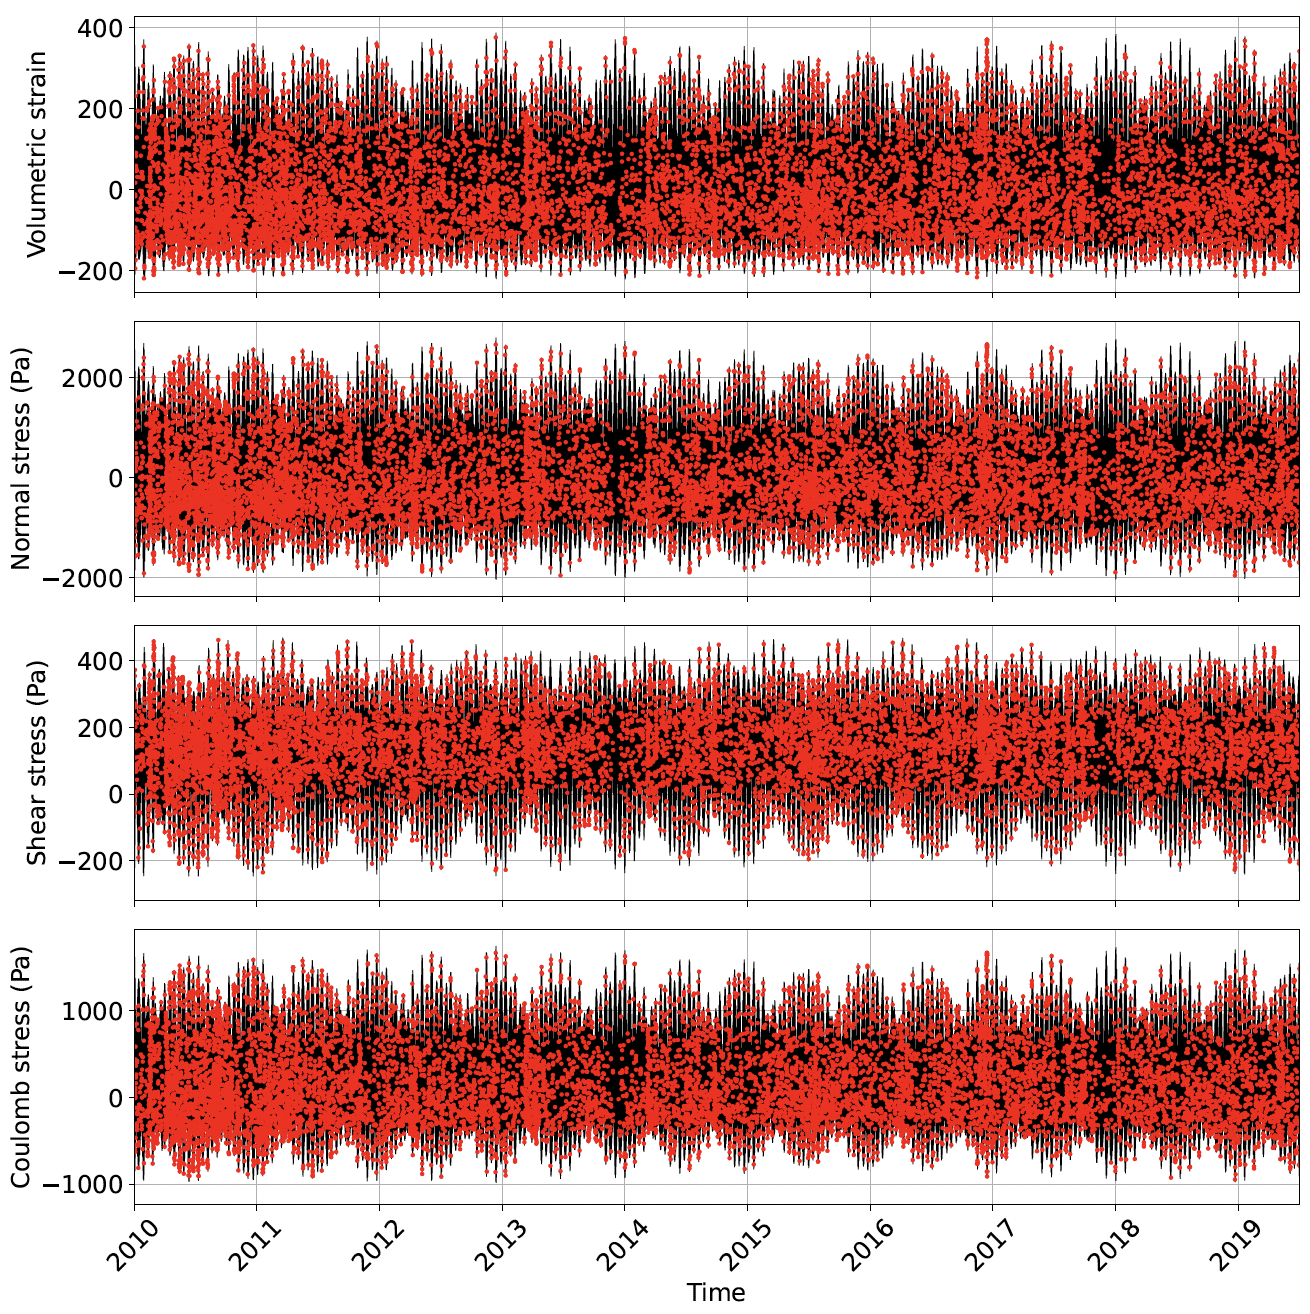

###  **5.5 Analysis | Entire region**

Analysis of the entire region

***Input:***

    1)	phases and levels of observed earthquake events (4 files)
    output/tidal_phase/$name_phase_stress_obs_CFS.txt
    output/tidal_phase/$name_phase_stress_obs_N.txt
    output/tidal_phase/$name_phase_stress_obs_S.txt
    output/tidal_phase/$name_phase_stress_obs_Vol.txt

    2)	phases and levels of reference earthquake events (4 files)
    output/tidal_phase/$name_phase_stress_ref_CFS.txt
    output/tidal_phase/$name_phase_stress_ref_N.txt
    output/tidal_phase/$name_phase_stress_ref_S.txt
    output/tidal_phase/$name_phase_stress_ref_Vol.txt

***Output:***

    1) Based on tidal phase
    output/figures/$name_entire_region_CFS.pdf
    output/figures/$name_entire_region_N.pdf
    output/figures/$name_entire_region_S.pdf
    output/figures/$name_entire_region_Vol.pdf

    2) Based on tidal level
    output/figures/$name_entire_region_tidal_sensitivity.pdf

***Run:***

    python ex_ana2_entire_region.py

In [ ]:
!python ex_ana2_entire_region.py

src_path = /content/TiMEpy/config
====== Analysis | Entire region: Start ======
Loading observational data (txt files)
Loading reference data (txt files)
Fitted amplitude = 0.055
Fitted phase_shift = -77.443 deg
Fitted amplitude = 0.037
Fitted phase_shift = 91.036 deg
Fitted amplitude = 0.053
Fitted phase_shift = -80.939 deg
Fitted amplitude = 0.065
Fitted phase_shift = -60.573 deg
Estimated a: 0.04989239123007684 with delta: 0.03505361469418102
Estimated C: 0.1521946748501831 with delta: 0.0028389863607882642
Estimated a: 0.0688528459322297 with delta: 0.14168193269536591
Estimated C: 0.15189477344201696 with delta: 0.004103908071407261
Estimated a: 0.028023738771786422 with delta: 0.020181610749257877
Estimated C: 0.15330077680935356 with delta: 0.0027159661939578942
Estimated a: 0.2479081033403533 with delta: 0.1474506765979004
Estimated C: 0.1533617492938483 with delta: 0.002714548534906241
Fitted amplitude = 0.055
Fitted phase_shift = -77.443 deg
The tidal phase and amplitude (Vol

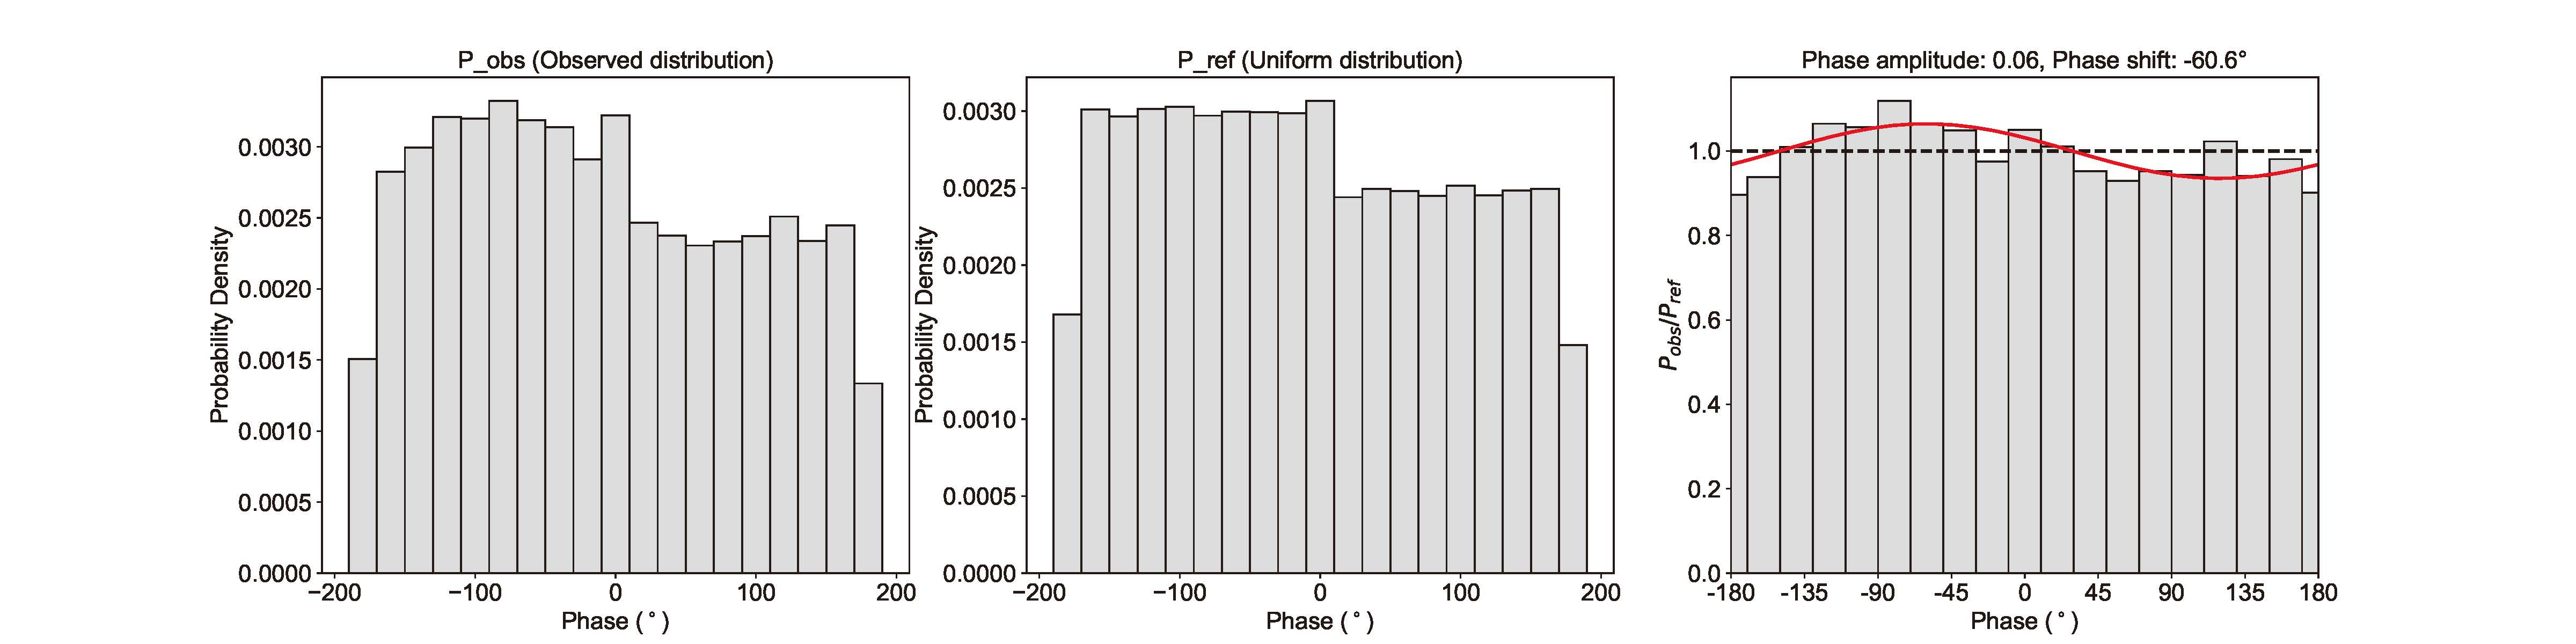

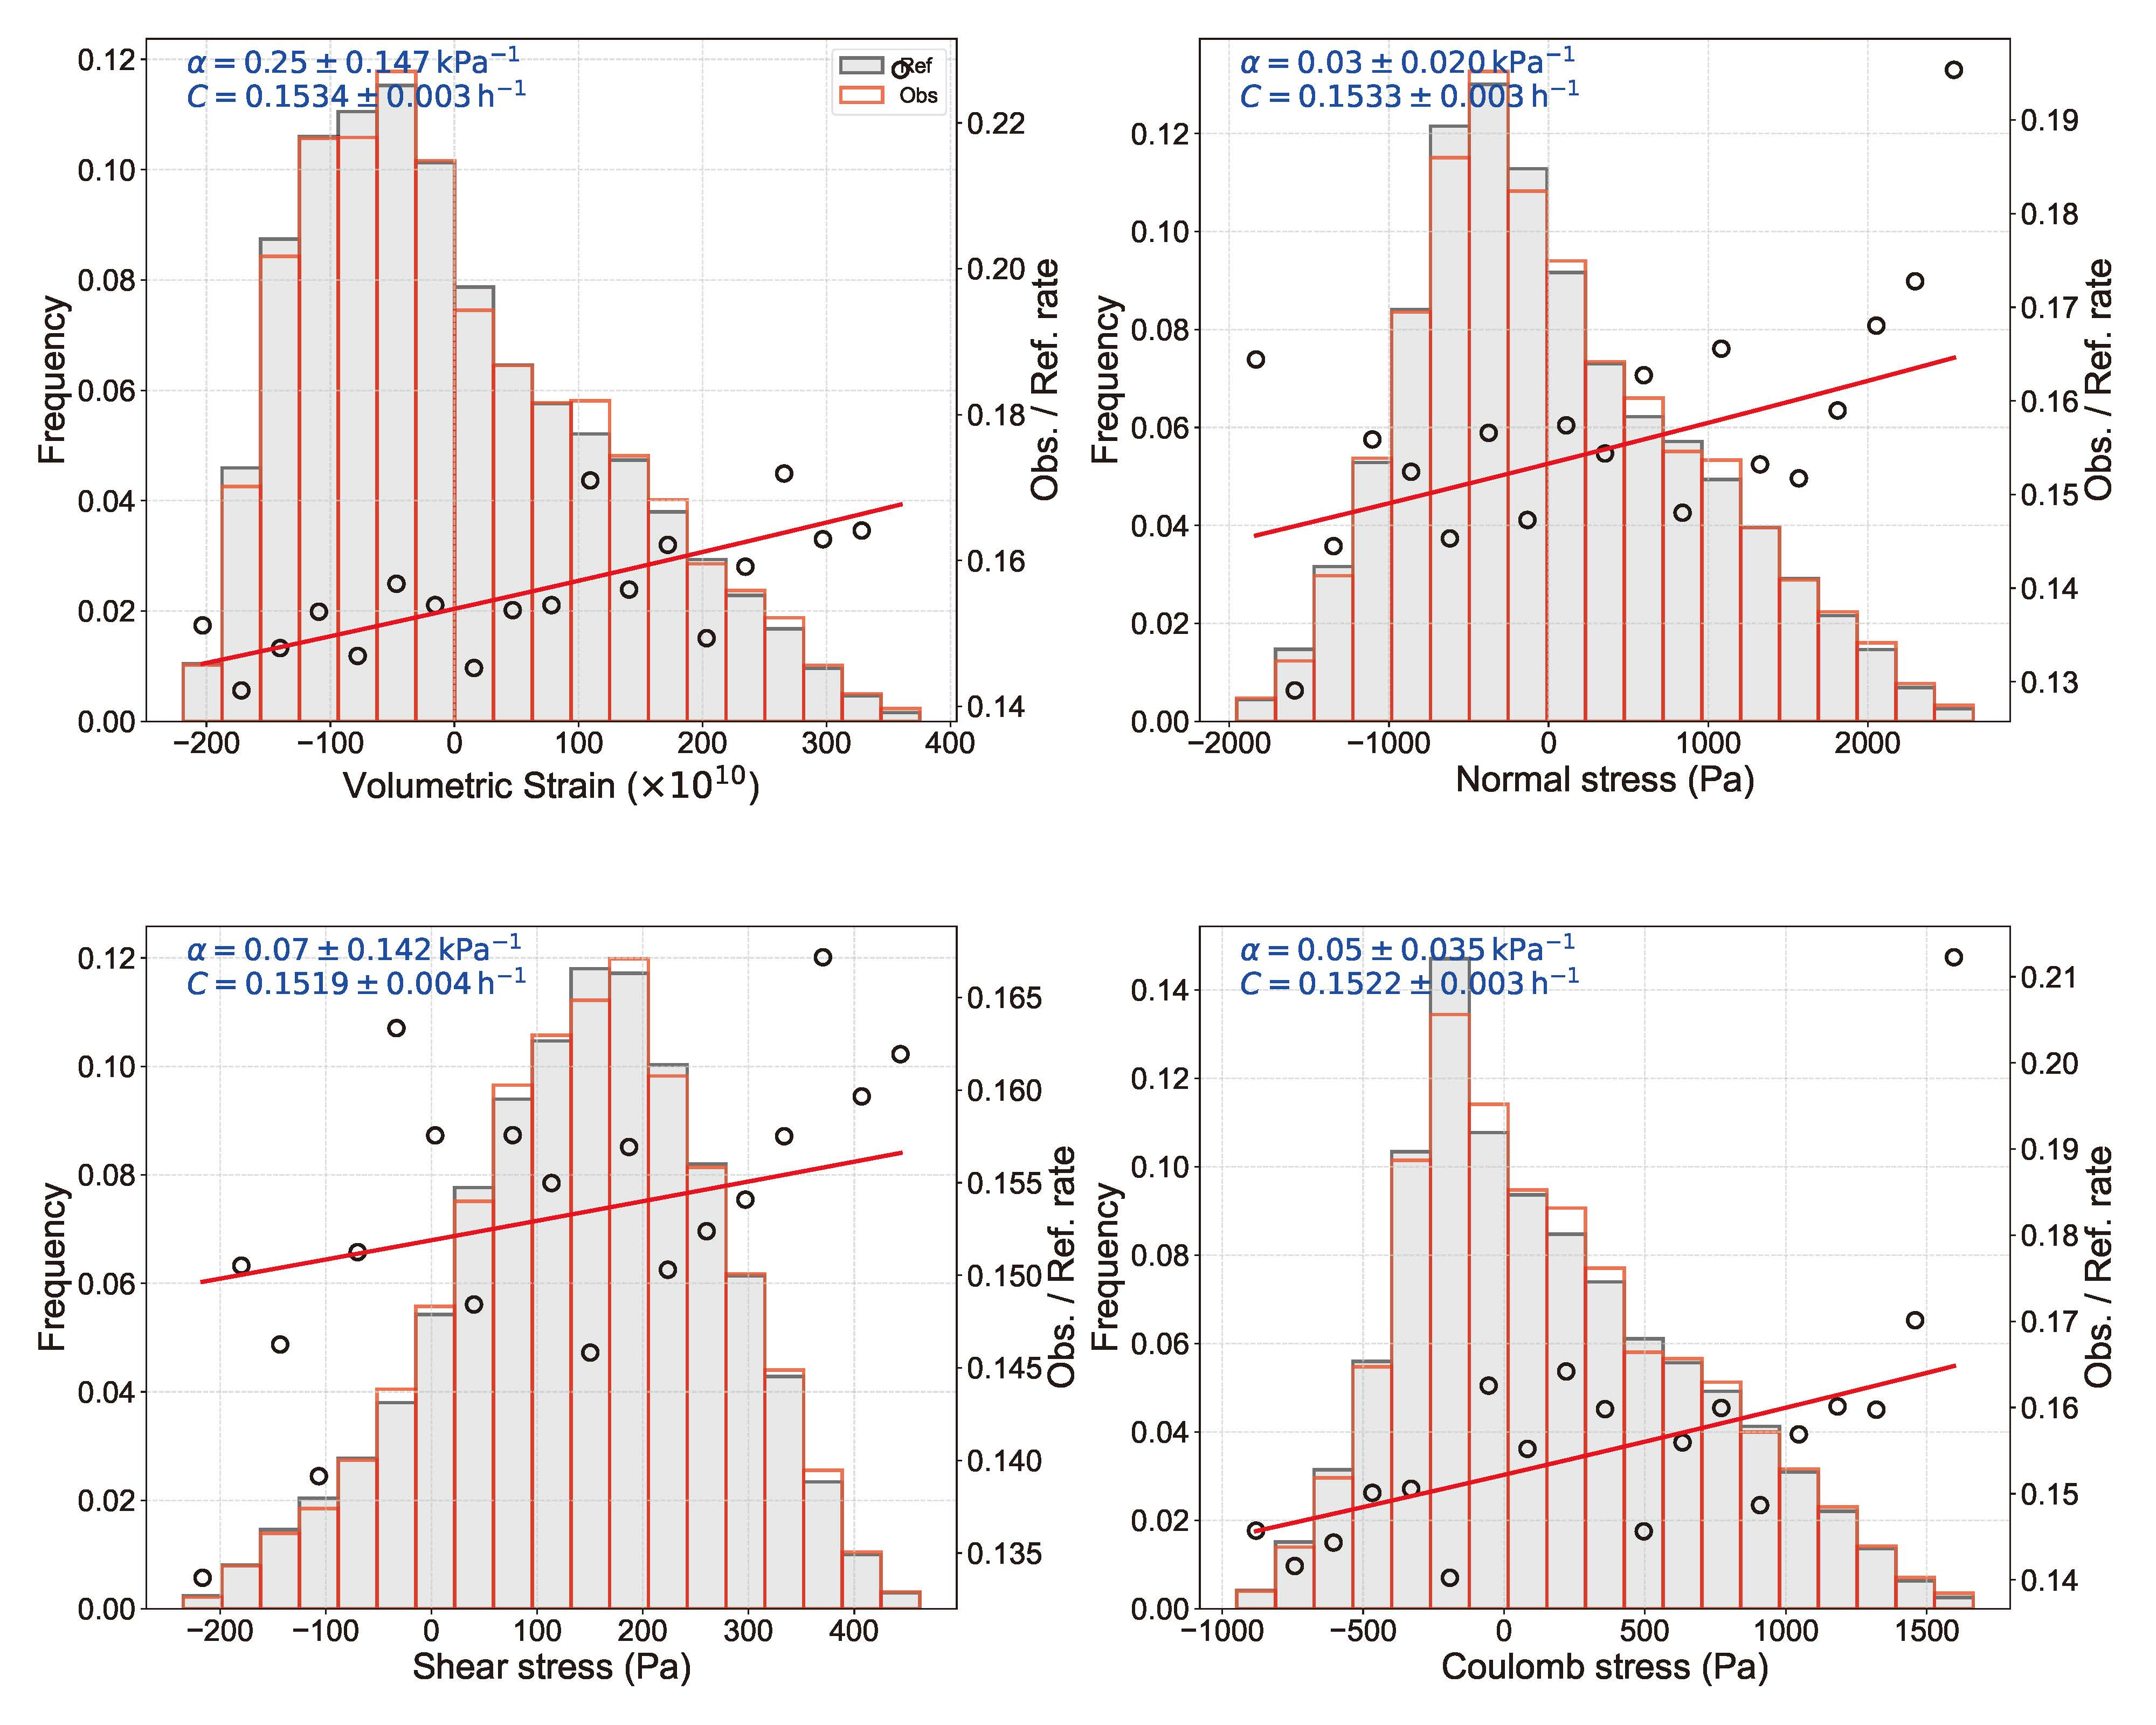

### **5.6 Analysis | Temporal variation**

***Input:***

    phases and levels of observed earthquake events (4 files)
    phases and levels of reference earthquake events (4 files)

***Output:***

    1) Based on tidal phase
    output/figures/$name_temp_variation_p_value.pdf
    output/figures/$name_temp_variation_phase_amplitude.pdf
    output/figures/$name_temp_variation_phase_shift.pdf

    2) Based on tidal level
    output/figures/$name_ temp_variation_tidal_sensitivity.pdf

    3)The results of four indexes under Coulomb stress
    output/figures/$name_temp_variation_CFS.pdf

***Run:***

    python ex_ana3_temp_variation.py

In [ ]:
!python ex_ana3_temp_variation.py

src_path = /content/TiMEpy/config
====== Analysis | Temporal variation: Start ======
Loading observational data (txt files)
Loading reference data (txt files)
Fitted amplitude = 0.024
Fitted phase_shift = 74.536 deg
Fitted amplitude = 0.048
Fitted phase_shift = -119.306 deg
Fitted amplitude = 0.052
Fitted phase_shift = -99.316 deg
Fitted amplitude = 0.060
Fitted phase_shift = -103.371 deg
Estimated a: 0.11807360668142546 with delta: 0.21019276517541438
Estimated C: 0.18825402059863394 with delta: 0.00746855289658032
Estimated a: -0.005122158326059313 with delta: 0.029641713404617777
Estimated C: 0.1914373109121425 with delta: 0.0050729583568378785
Estimated a: -0.053684788069918374 with delta: 0.21863135132684747
Estimated C: 0.1913229966980112 with delta: 0.005069661781294827
Estimated a: -0.00948422513012079 with delta: 0.050876283684445016
Estimated C: 0.19182877419357547 with delta: 0.005287052862423427
Fitted amplitude = 0.025
Fitted phase_shift = 61.559 deg
Fitted amplitude = 0.0

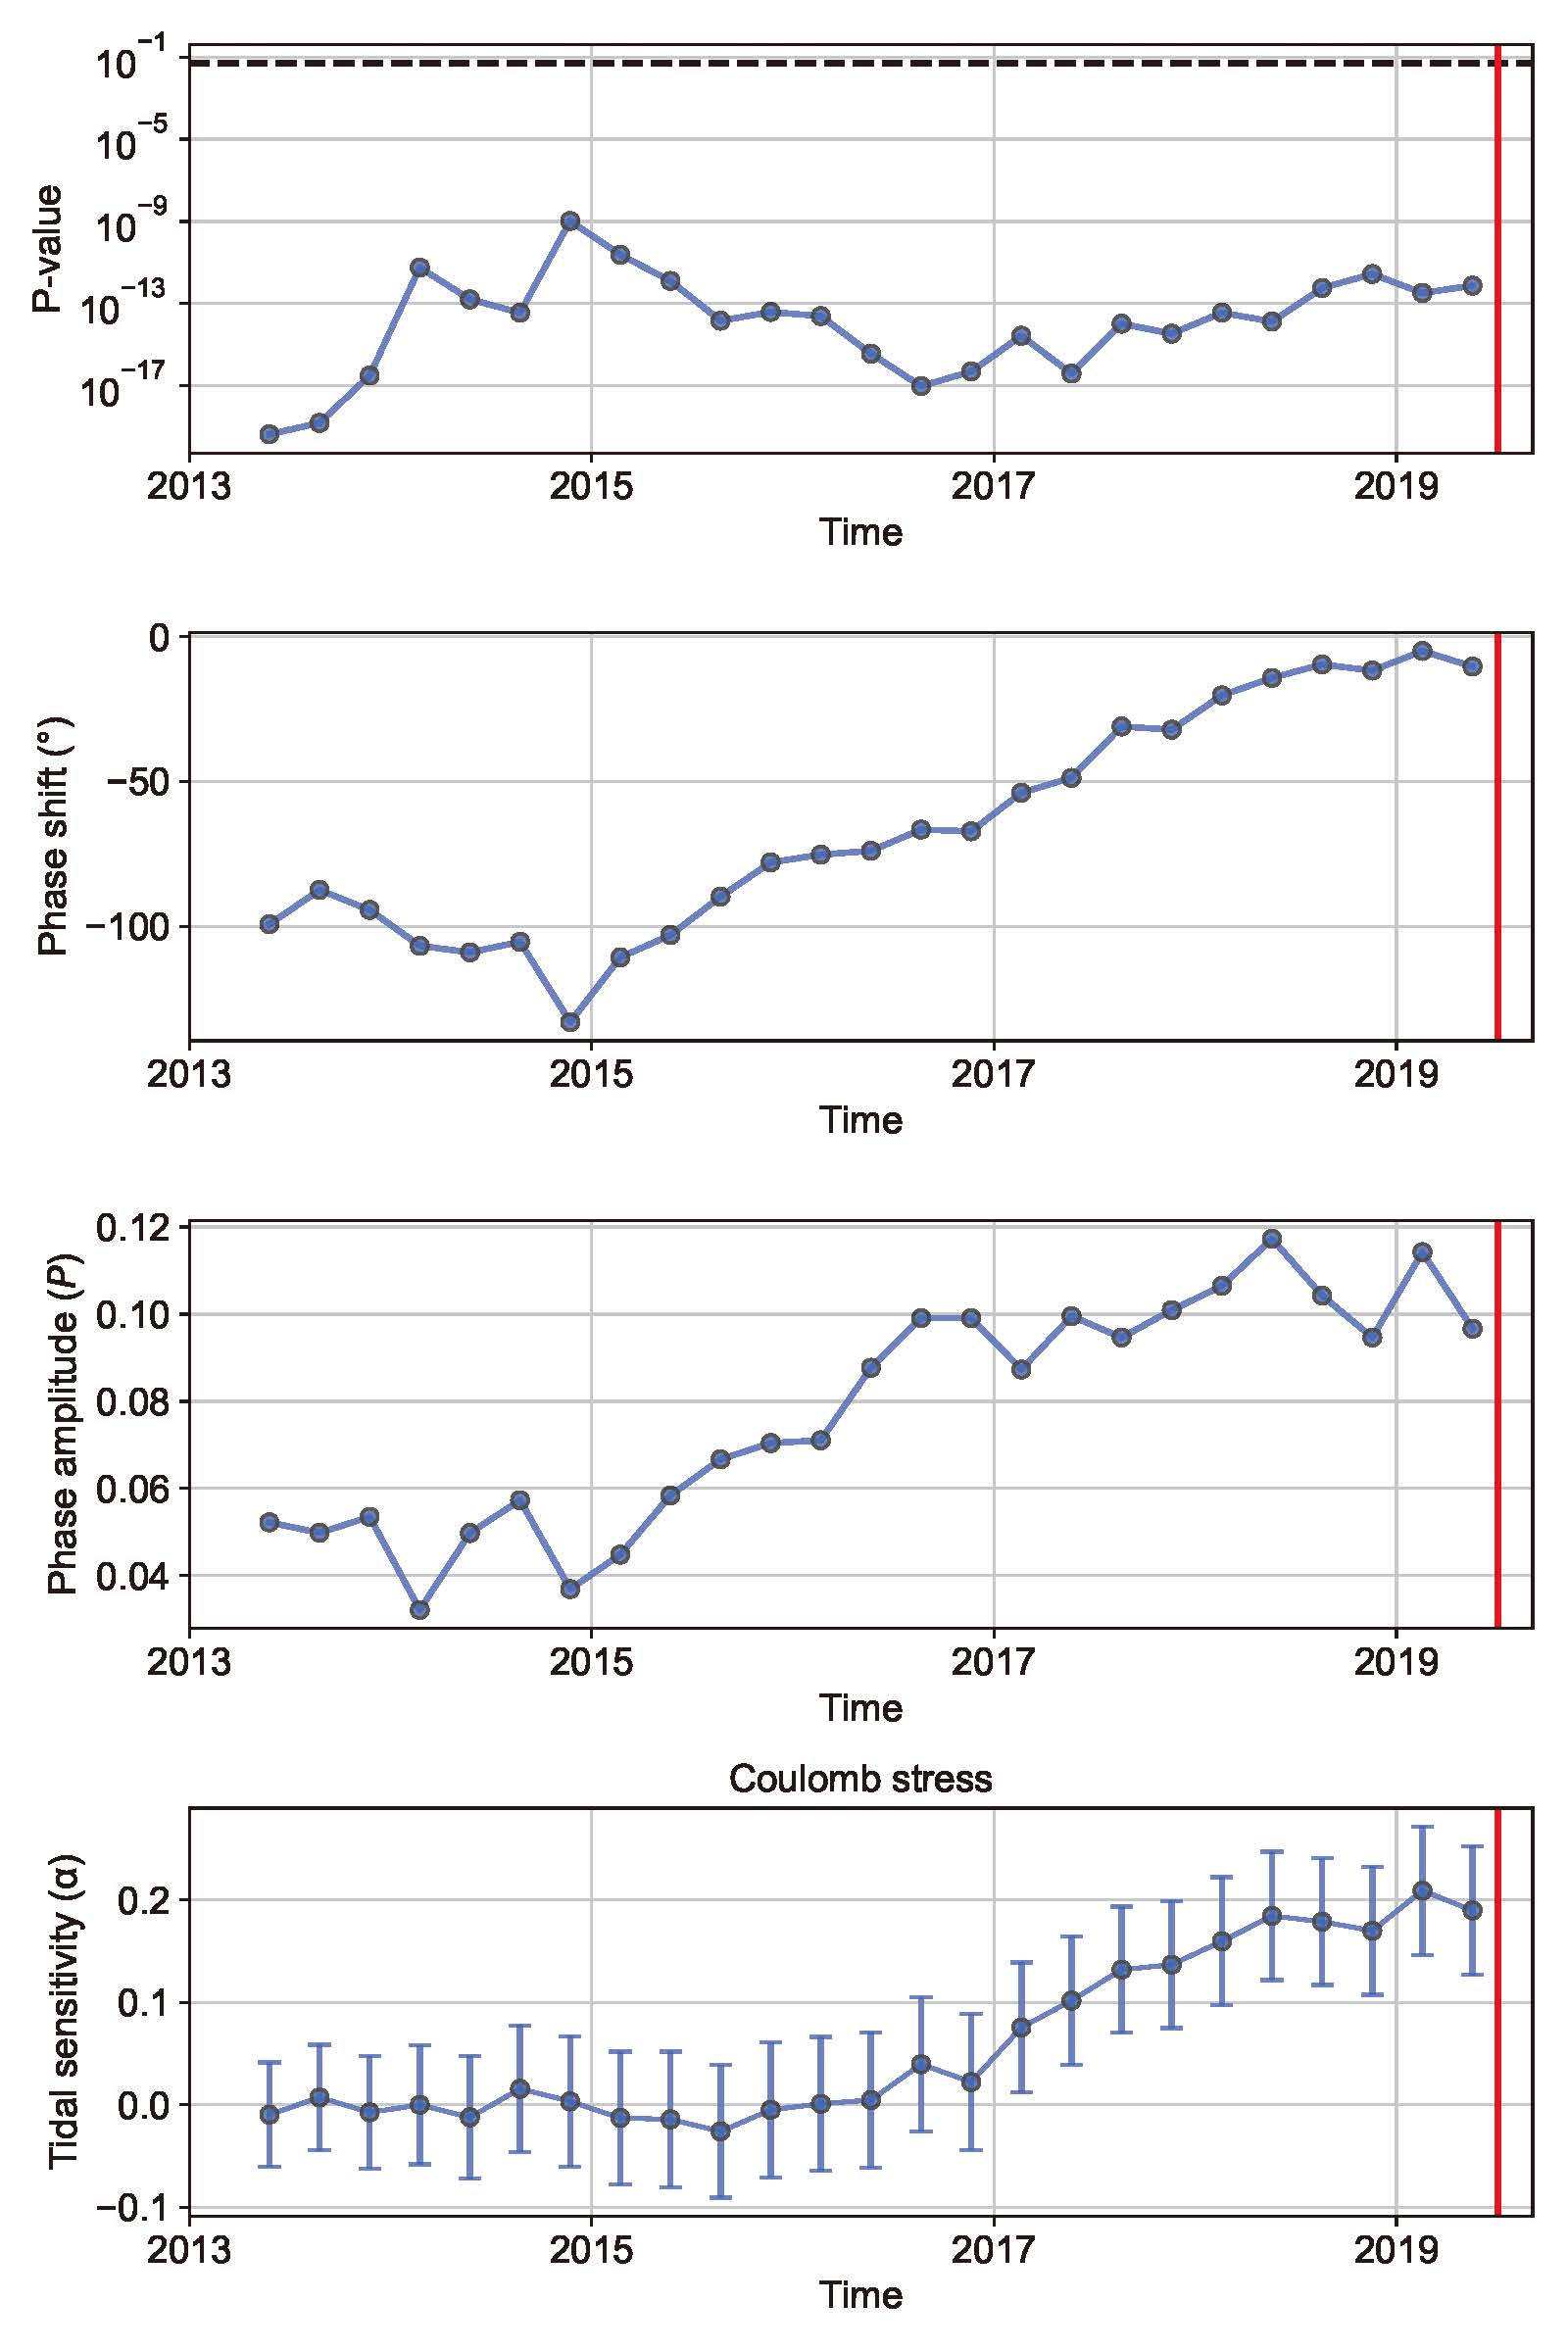

### **5.7 Analysis |  B-value measurement**

***Input:***

    catalog/$name_select_catalog.txt

***Output:***

    output/figures/$name_b_value.pdf

***Run:***

    python ex_ana4_b_value.py

In [ ]:
!python ex_ana4_b_value.py

src_path = /content/TiMEpy/config
====== Analysis | B value measurement : Start ======
The B value plotted and saved to ../ex_ridgecrest/output/figure/RC_b_value.pdf
====== Analysis | B value measurement : End ======


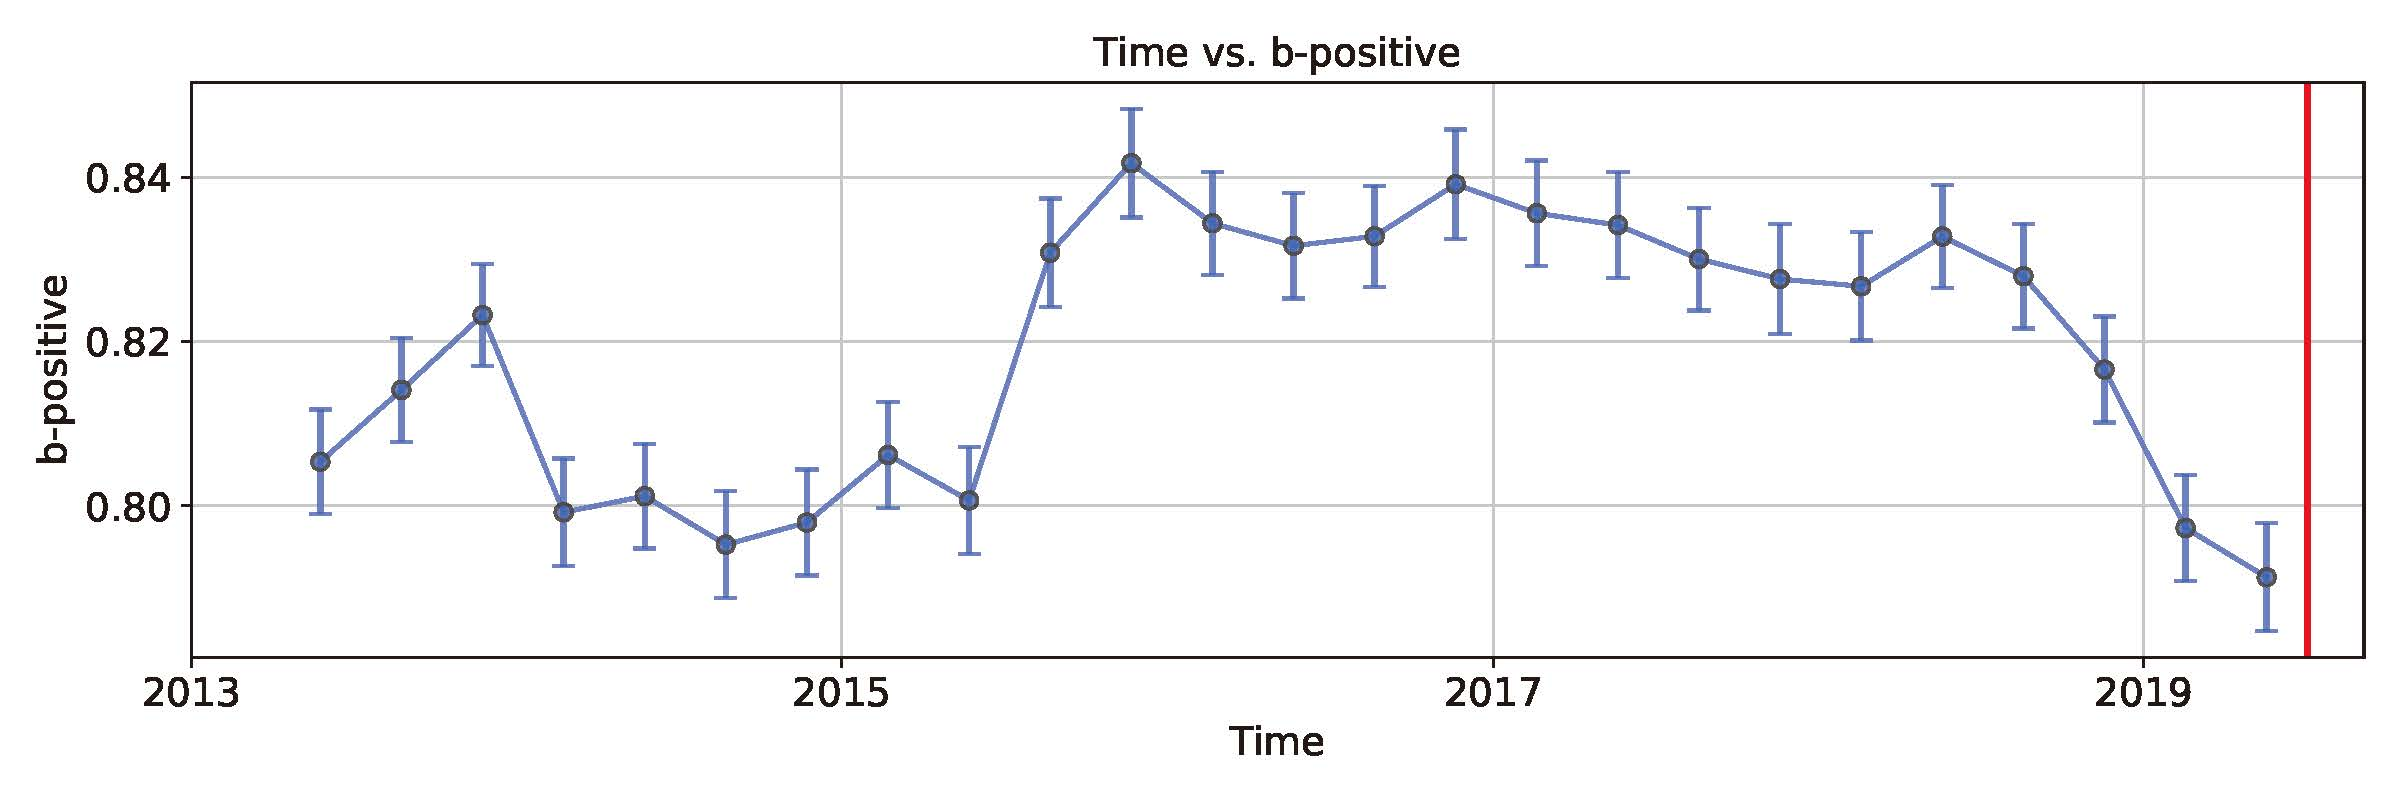